In [42]:
pip install requests beautifulsoup4 pandas 

Note: you may need to restart the kernel to use updated packages.


In [7]:
from bs4 import BeautifulSoup as bs
import pandas as pd
import requests

In [46]:
url = "https://kworb.net/ww/archive/20240801.html"
data = requests.get(url)

In [48]:
data

<Response [200]>

In [50]:
bs(data.text)

<!DOCTYPE html>
<html lang="en"><head><title>Worldwide iTunes Song Chart </title>
<link href="/css/standard0002.css" rel="stylesheet" type="text/css"/>
<link href="/css/tables0010.css" rel="stylesheet" type="text/css"/>
<link href="/css/menus0001.css" rel="stylesheet" type="text/css"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="A website that collects and analyzes music data from around the world. All of the charts, sales and streams, constantly updated." name="description"/>
<meta content="music, charts, iTunes, Spotify, YouTube, artists, radio, popularity, sales, streaming, views, certifications" name="keywords"/>
<script src="https://ajax.googleapis.com/ajax/libs/jquery/1.12.4/jquery.min.js"></script>
<script src="/sorttable.js"></script>
<script>
  (function(i,s,o,g,r,a,m){i['GoogleAnalyticsObject']=r;i[r]=i[r]||function(){
  (i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o),
  m=s.getElementsByTagName(o)[0];a.asy

In [52]:
soup = bs(data.text, 'html.parser')

In [54]:
soup

<!DOCTYPE html>

<html lang="en"><head><title>Worldwide iTunes Song Chart </title>
<link href="/css/standard0002.css" rel="stylesheet" type="text/css"/>
<link href="/css/tables0010.css" rel="stylesheet" type="text/css"/>
<link href="/css/menus0001.css" rel="stylesheet" type="text/css"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="A website that collects and analyzes music data from around the world. All of the charts, sales and streams, constantly updated." name="description"/>
<meta content="music, charts, iTunes, Spotify, YouTube, artists, radio, popularity, sales, streaming, views, certifications" name="keywords"/>
<script src="https://ajax.googleapis.com/ajax/libs/jquery/1.12.4/jquery.min.js"></script>
<script src="/sorttable.js"></script>
<script>
  (function(i,s,o,g,r,a,m){i['GoogleAnalyticsObject']=r;i[r]=i[r]||function(){
  (i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o),
  m=s.getElementsByTagName(o)[0];a.as

In [56]:
table = soup.find("table")

In [58]:
table

<table cellpadding="2" cellspacing="0" class="sortable" width="3060">
<colgroup><col class="col-pos"/><col class="col-pos"/><col class="col-title"/><col class="col-period"/><col class="col-peak"/><col class="col-peak2"/><col class="col-smallnumber"/><col class="col-smallnumber"/><col class="col-smallnumber"/><col class="col-pos"/><col class="col-pos"/><col class="col-pos"/><col class="col-pos"/><col class="col-pos"/><col class="col-pos"/><col class="col-pos"/><col class="col-pos"/><col class="col-pos"/><col class="col-pos"/><col class="col-pos"/><col class="col-pos"/><col class="col-pos"/><col class="col-pos"/><col class="col-pos"/><col class="col-pos"/><col class="col-pos"/><col class="col-pos"/><col class="col-pos"/><col class="col-pos"/><col class="col-pos"/><col class="col-pos"/><col class="col-pos"/><col class="col-pos"/><col class="col-pos"/><col class="col-pos"/><col class="col-pos"/><col class="col-pos"/><col class="col-pos"/><col class="col-pos"/><col class="col-pos"/><col cla

In [60]:
headers = [header.text for header in table.find_all('th')]

In [62]:
headers

['Pos',
 'P+',
 'Artist and Title',
 'Days',
 'Pk',
 '(x?)',
 'Pts',
 'Pts+',
 'TPts',
 'US',
 'UK',
 'DE',
 'AU',
 'JP',
 'AT',
 'BE',
 'CA',
 'CH',
 'ES',
 'FR',
 'ID',
 'IN',
 'IT',
 'MX',
 'NL',
 'RU',
 'TH',
 'TR',
 'ZA',
 'AE',
 'BR',
 'CO',
 'DK',
 'HK',
 'IE',
 'LU',
 'MY',
 'NO',
 'NZ',
 'PH',
 'PL',
 'SE',
 'SG',
 'TW',
 'AR',
 'CL',
 'CR',
 'CZ',
 'EC',
 'EE',
 'EG',
 'FI',
 'GR',
 'GT',
 'HU',
 'IL',
 'KE',
 'KZ',
 'LB',
 'LT',
 'NG',
 'PE',
 'PT',
 'RO',
 'SA',
 'SI',
 'SK',
 'UA',
 'VN']

In [64]:
rows = []
for row in table.find_all('tr')[1:]:  # Skip the header row
    cells = [cell.text for cell in row.find_all('td')]
    rows.append(cells)
   

In [66]:
df = pd.DataFrame(rows, columns=headers)

In [68]:
df

,Pos,P+,Artist and Title,Days,Pk,(x?),Pts,Pts+,TPts,US,...,LT,NG,PE,PT,RO,SA,SI,SK,UA,VN
0,1,+1,*NSYNC - Bye Bye Bye,8,1,(x2),13458,+1229,0.110,40,...,,,2,,,,,,,15
1,2,-1,Billie Eilish - BIRDS OF A FEATHER,77,1,(x3),12889,-780,0.703,23,...,,,,,,,,,,37
2,3,=,Shaboozey - A Bar Song,112,1,(x3),11736,-168,1.080,1,...,,,,,,,,,,
3,4,+1,Benson Boone - Beautiful Things,196,1,(x35),11280,+1300,2.570,28,...,,,,,,,,,,
4,5,-1,Disturbed - The Sound of Silence,1437,1,(x2),10549,-664,6.915,67,...,61,,,,2,,,2,59,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,-72,The Blackout Crew - Dance the Night Away,3,84,,927,-414,0.006,,...,,,,,,,,,,
196,197,+27,AYLIVA - Nein,9,61,,927,+69,0.018,,...,,,,,,,,,,
197,198,+4,MY FIRST STORY & HYDE - MUGEN,61,53,,927,-18,0.111,,...,,,,,,,,,,
198,199,-60,Sia - Chandelier,1365,3,(x2),914,-339,8.619,,...,32,19,78,49,43,53,25,,68,


In [70]:
final_table_1_8=df.drop(columns=['US','UK','DE','AU','JP','AT','BE','CA','CH','ES','FR','ID','IN','IT','MX','NL','RU','TH'	,'TR','ZA','AE','BR','CO','DK','HK','IE','LU','MY','NO','NZ','PH','PL','SE','SG','TW','AR','CL','CR','CZ','EC','EE','EG','FI','GR','GT','HU','IL','KE','KZ','LB','LT','NG','PE','PT','RO','SA','SI','SK','UA','VN'])

In [72]:
final_table_1_8

,Pos,P+,Artist and Title,Days,Pk,(x?),Pts,Pts+,TPts
0,1,+1,*NSYNC - Bye Bye Bye,8,1,(x2),13458,+1229,0.110
1,2,-1,Billie Eilish - BIRDS OF A FEATHER,77,1,(x3),12889,-780,0.703
2,3,=,Shaboozey - A Bar Song,112,1,(x3),11736,-168,1.080
3,4,+1,Benson Boone - Beautiful Things,196,1,(x35),11280,+1300,2.570
4,5,-1,Disturbed - The Sound of Silence,1437,1,(x2),10549,-664,6.915
...,...,...,...,...,...,...,...,...,...
195,196,-72,The Blackout Crew - Dance the Night Away,3,84,,927,-414,0.006
196,197,+27,AYLIVA - Nein,9,61,,927,+69,0.018
197,198,+4,MY FIRST STORY & HYDE - MUGEN,61,53,,927,-18,0.111
198,199,-60,Sia - Chandelier,1365,3,(x2),914,-339,8.619


In [74]:
print(final_table_1_8.isnull().sum())

Pos                 0
P+                  0
Artist and Title    0
Days                0
Pk                  0
(x?)                0
Pts                 0
Pts+                0
TPts                0
dtype: int64


In [76]:
final_table_1_8[['Artist', 'Title']] = final_table_1_8['Artist and Title'].str.split('-', n=1, expand=True)

In [78]:
final_table_1_8=final_table_1_8.drop(columns=['Artist and Title'])

In [80]:
final_table_1_8

,Pos,P+,Days,Pk,(x?),Pts,Pts+,TPts,Artist,Title
0,1,+1,8,1,(x2),13458,+1229,0.110,*NSYNC,Bye Bye Bye
1,2,-1,77,1,(x3),12889,-780,0.703,Billie Eilish,BIRDS OF A FEATHER
2,3,=,112,1,(x3),11736,-168,1.080,Shaboozey,A Bar Song
3,4,+1,196,1,(x35),11280,+1300,2.570,Benson Boone,Beautiful Things
4,5,-1,1437,1,(x2),10549,-664,6.915,Disturbed,The Sound of Silence
...,...,...,...,...,...,...,...,...,...,...
195,196,-72,3,84,,927,-414,0.006,The Blackout Crew,Dance the Night Away
196,197,+27,9,61,,927,+69,0.018,AYLIVA,Nein
197,198,+4,61,53,,927,-18,0.111,MY FIRST STORY & HYDE,MUGEN
198,199,-60,1365,3,(x2),914,-339,8.619,Sia,Chandelier


In [82]:
print(final_table_1_8.dtypes)

Pos       object
P+        object
Days      object
Pk        object
(x?)      object
Pts       object
Pts+      object
TPts      object
Artist    object
Title     object
dtype: object


In [84]:
final_table_1_8 = pd.DataFrame(final_table_1_8)

In [86]:
final_table_1_8.to_csv('Worldwide iTunes Song Chart_1_8.csv', index=False)

In [88]:
#second table-------------------------------------------------------

In [90]:
url2 = "https://kworb.net/ww/archive/20240802.html"
data2 = requests.get(url2)

In [92]:
data2

<Response [200]>

In [94]:
bs(data2.text)

<!DOCTYPE html>
<html lang="en"><head><title>Worldwide iTunes Song Chart </title>
<link href="/css/standard0002.css" rel="stylesheet" type="text/css"/>
<link href="/css/tables0010.css" rel="stylesheet" type="text/css"/>
<link href="/css/menus0001.css" rel="stylesheet" type="text/css"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="A website that collects and analyzes music data from around the world. All of the charts, sales and streams, constantly updated." name="description"/>
<meta content="music, charts, iTunes, Spotify, YouTube, artists, radio, popularity, sales, streaming, views, certifications" name="keywords"/>
<script src="https://ajax.googleapis.com/ajax/libs/jquery/1.12.4/jquery.min.js"></script>
<script src="/sorttable.js"></script>
<script>
  (function(i,s,o,g,r,a,m){i['GoogleAnalyticsObject']=r;i[r]=i[r]||function(){
  (i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o),
  m=s.getElementsByTagName(o)[0];a.asy

In [96]:
soup2 = bs(data2.text, 'html.parser')

In [98]:
soup2

<!DOCTYPE html>

<html lang="en"><head><title>Worldwide iTunes Song Chart </title>
<link href="/css/standard0002.css" rel="stylesheet" type="text/css"/>
<link href="/css/tables0010.css" rel="stylesheet" type="text/css"/>
<link href="/css/menus0001.css" rel="stylesheet" type="text/css"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="A website that collects and analyzes music data from around the world. All of the charts, sales and streams, constantly updated." name="description"/>
<meta content="music, charts, iTunes, Spotify, YouTube, artists, radio, popularity, sales, streaming, views, certifications" name="keywords"/>
<script src="https://ajax.googleapis.com/ajax/libs/jquery/1.12.4/jquery.min.js"></script>
<script src="/sorttable.js"></script>
<script>
  (function(i,s,o,g,r,a,m){i['GoogleAnalyticsObject']=r;i[r]=i[r]||function(){
  (i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o),
  m=s.getElementsByTagName(o)[0];a.as

In [100]:
table2 = soup2.find("table")

In [102]:
table2

<table cellpadding="2" cellspacing="0" class="sortable" width="3060">
<colgroup><col class="col-pos"/><col class="col-pos"/><col class="col-title"/><col class="col-period"/><col class="col-peak"/><col class="col-peak2"/><col class="col-smallnumber"/><col class="col-smallnumber"/><col class="col-smallnumber"/><col class="col-pos"/><col class="col-pos"/><col class="col-pos"/><col class="col-pos"/><col class="col-pos"/><col class="col-pos"/><col class="col-pos"/><col class="col-pos"/><col class="col-pos"/><col class="col-pos"/><col class="col-pos"/><col class="col-pos"/><col class="col-pos"/><col class="col-pos"/><col class="col-pos"/><col class="col-pos"/><col class="col-pos"/><col class="col-pos"/><col class="col-pos"/><col class="col-pos"/><col class="col-pos"/><col class="col-pos"/><col class="col-pos"/><col class="col-pos"/><col class="col-pos"/><col class="col-pos"/><col class="col-pos"/><col class="col-pos"/><col class="col-pos"/><col class="col-pos"/><col class="col-pos"/><col cla

In [104]:
headers2 = [header.text for header in table2.find_all('th')]

In [106]:
headers2

['Pos',
 'P+',
 'Artist and Title',
 'Days',
 'Pk',
 '(x?)',
 'Pts',
 'Pts+',
 'TPts',
 'US',
 'UK',
 'DE',
 'AU',
 'JP',
 'AT',
 'BE',
 'CA',
 'CH',
 'ES',
 'FR',
 'ID',
 'IN',
 'IT',
 'MX',
 'NL',
 'RU',
 'TH',
 'TR',
 'ZA',
 'AE',
 'BR',
 'CO',
 'DK',
 'HK',
 'IE',
 'LU',
 'MY',
 'NO',
 'NZ',
 'PH',
 'PL',
 'SE',
 'SG',
 'TW',
 'AR',
 'CL',
 'CR',
 'CZ',
 'EC',
 'EE',
 'EG',
 'FI',
 'GR',
 'GT',
 'HU',
 'IL',
 'KE',
 'KZ',
 'LB',
 'LT',
 'NG',
 'PE',
 'PT',
 'RO',
 'SA',
 'SI',
 'SK',
 'UA',
 'VN']

In [108]:
rows2 = []
for row in table2.find_all('tr')[1:]: 
    cells = [cell.text for cell in row.find_all('td')]
    rows2.append(cells)
   

In [110]:
df2 = pd.DataFrame(rows2, columns=headers2)

In [112]:
df2

,Pos,P+,Artist and Title,Days,Pk,(x?),Pts,Pts+,TPts,US,...,LT,NG,PE,PT,RO,SA,SI,SK,UA,VN
0,1,+117,Jimin - Be Mine,11,1,(x1),23817,+22499,0.090,2,...,42,,1,1,1,1,,,1,2
1,2,NEW,Charli xcx & Billie Eilish - Guess,1,2,(x1),16184,+16184,0.016,6,...,50,,3,,7,,,,8,
2,3,-1,Billie Eilish - BIRDS OF A FEATHER,78,1,(x3),11791,-1098,0.715,18,...,43,,,,,,,,,
3,4,-1,Shaboozey - A Bar Song,113,1,(x3),11668,-68,1.091,1,...,,,,,,,,,,
4,5,=,Disturbed - The Sound of Silence,1438,1,(x2),10835,+286,6.926,73,...,27,,,,47,,,54,71,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,-12,Jelly Roll - Dead End Road,15,50,,976,+9,0.029,54,...,,,,,,,,,,
196,197,+14,Tony Effe & GAIA - SESSO E SAMBA,32,89,,971,+93,0.068,,...,,,,,,,,,,
197,198,NEW,Felix Jaehn - Ready For Your Love,12,33,,970,+272,0.029,,...,,,,,,,,,,
198,199,+2,Yuuri - Curtain Call,13,58,,964,+55,0.019,,...,,,,,,,,,,


In [114]:
final_table_2_8=df2.drop(columns=['US','UK','DE','AU','JP','AT','BE','CA','CH','ES','FR','ID','IN','IT','MX','NL','RU','TH'	,'TR','ZA','AE','BR','CO','DK','HK','IE','LU','MY','NO','NZ','PH','PL','SE','SG','TW','AR','CL','CR','CZ','EC','EE','EG','FI','GR','GT','HU','IL','KE','KZ','LB','LT','NG','PE','PT','RO','SA','SI','SK','UA','VN'])


In [116]:
final_table_2_8

,Pos,P+,Artist and Title,Days,Pk,(x?),Pts,Pts+,TPts
0,1,+117,Jimin - Be Mine,11,1,(x1),23817,+22499,0.090
1,2,NEW,Charli xcx & Billie Eilish - Guess,1,2,(x1),16184,+16184,0.016
2,3,-1,Billie Eilish - BIRDS OF A FEATHER,78,1,(x3),11791,-1098,0.715
3,4,-1,Shaboozey - A Bar Song,113,1,(x3),11668,-68,1.091
4,5,=,Disturbed - The Sound of Silence,1438,1,(x2),10835,+286,6.926
...,...,...,...,...,...,...,...,...,...
195,196,-12,Jelly Roll - Dead End Road,15,50,,976,+9,0.029
196,197,+14,Tony Effe & GAIA - SESSO E SAMBA,32,89,,971,+93,0.068
197,198,NEW,Felix Jaehn - Ready For Your Love,12,33,,970,+272,0.029
198,199,+2,Yuuri - Curtain Call,13,58,,964,+55,0.019


In [118]:
print(final_table_2_8.isnull().sum())


Pos                 0
P+                  0
Artist and Title    0
Days                0
Pk                  0
(x?)                0
Pts                 0
Pts+                0
TPts                0
dtype: int64


In [120]:
final_table_2_8[['Artist', 'Title']] = final_table_2_8['Artist and Title'].str.split('-', n=1, expand=True)



In [122]:
final_table_2_8=final_table_2_8.drop(columns=['Artist and Title'])

In [124]:
final_table_2_8

,Pos,P+,Days,Pk,(x?),Pts,Pts+,TPts,Artist,Title
0,1,+117,11,1,(x1),23817,+22499,0.090,Jimin,Be Mine
1,2,NEW,1,2,(x1),16184,+16184,0.016,Charli xcx & Billie Eilish,Guess
2,3,-1,78,1,(x3),11791,-1098,0.715,Billie Eilish,BIRDS OF A FEATHER
3,4,-1,113,1,(x3),11668,-68,1.091,Shaboozey,A Bar Song
4,5,=,1438,1,(x2),10835,+286,6.926,Disturbed,The Sound of Silence
...,...,...,...,...,...,...,...,...,...,...
195,196,-12,15,50,,976,+9,0.029,Jelly Roll,Dead End Road
196,197,+14,32,89,,971,+93,0.068,Tony Effe & GAIA,SESSO E SAMBA
197,198,NEW,12,33,,970,+272,0.029,Felix Jaehn,Ready For Your Love
198,199,+2,13,58,,964,+55,0.019,Yuuri,Curtain Call


In [126]:
print(final_table_2_8.dtypes)

Pos       object
P+        object
Days      object
Pk        object
(x?)      object
Pts       object
Pts+      object
TPts      object
Artist    object
Title     object
dtype: object


In [128]:
final_table_2_8 = pd.DataFrame(final_table_2_8)

In [130]:
final_table_2_8.to_csv('Worldwide iTunes Song Chart_2_8.csv', index=False)

In [132]:
df1 = pd.read_csv('Worldwide iTunes Song Chart_1_8.csv')
df2 = pd.read_csv('Worldwide iTunes Song Chart_2_8.csv')

In [134]:
merged_charts_1_2 = pd.concat([df1, df2], ignore_index=True)

In [136]:
merged_charts_1_2

,Pos,P+,Days,Pk,(x?),Pts,Pts+,TPts,Artist,Title
0,1,+1,8,1,(x2),13458,1229,0.110,*NSYNC,Bye Bye Bye
1,2,-1,77,1,(x3),12889,-780,0.703,Billie Eilish,BIRDS OF A FEATHER
2,3,=,112,1,(x3),11736,-168,1.080,Shaboozey,A Bar Song
3,4,+1,196,1,(x35),11280,1300,2.570,Benson Boone,Beautiful Things
4,5,-1,1437,1,(x2),10549,-664,6.915,Disturbed,The Sound of Silence
...,...,...,...,...,...,...,...,...,...,...
395,196,-12,15,50,NaN,976,9,0.029,Jelly Roll,Dead End Road
396,197,+14,32,89,NaN,971,93,0.068,Tony Effe & GAIA,SESSO E SAMBA
397,198,NEW,12,33,NaN,970,272,0.029,Felix Jaehn,Ready For Your Love
398,199,+2,13,58,NaN,964,55,0.019,Yuuri,Curtain Call


In [138]:
merged_charts_1_2.fillna(0, inplace=True)

In [140]:
merged_charts_1_2

,Pos,P+,Days,Pk,(x?),Pts,Pts+,TPts,Artist,Title
0,1,+1,8,1,(x2),13458,1229,0.110,*NSYNC,Bye Bye Bye
1,2,-1,77,1,(x3),12889,-780,0.703,Billie Eilish,BIRDS OF A FEATHER
2,3,=,112,1,(x3),11736,-168,1.080,Shaboozey,A Bar Song
3,4,+1,196,1,(x35),11280,1300,2.570,Benson Boone,Beautiful Things
4,5,-1,1437,1,(x2),10549,-664,6.915,Disturbed,The Sound of Silence
...,...,...,...,...,...,...,...,...,...,...
395,196,-12,15,50,0,976,9,0.029,Jelly Roll,Dead End Road
396,197,+14,32,89,0,971,93,0.068,Tony Effe & GAIA,SESSO E SAMBA
397,198,NEW,12,33,0,970,272,0.029,Felix Jaehn,Ready For Your Love
398,199,+2,13,58,0,964,55,0.019,Yuuri,Curtain Call


In [142]:
merged_charts_1_2.to_csv('merged_charts_1_2.csv', index=False)

In [3]:
pip install matplotlip seaborn wordcloud

Note: you may need to restart the kernel to use updated packages.Collecting matplotlip



In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
vis = pd.read_csv('merged_charts_1_2.csv')

In [13]:
vis['Pos'] = pd.to_numeric(vis['Pos'], errors='coerce')


In [35]:
top_10_songs = vis.sort_values('Pos').head(14)


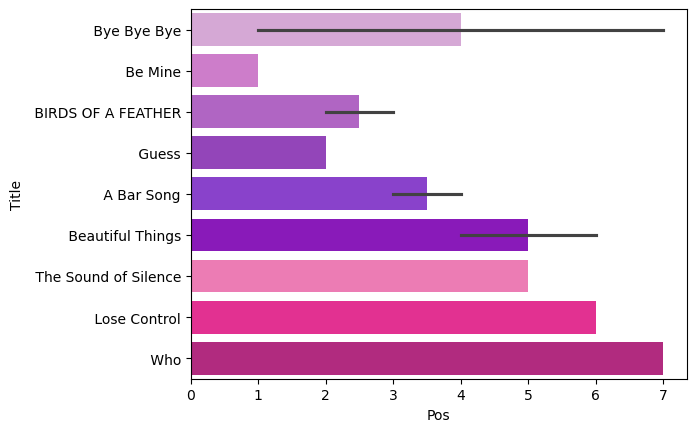

In [41]:

custom_palette = sns.color_palette(["#DDA0DD", "#DA70D6", "#BA55D3", "#9932CC", "#8A2BE2", "#9400D3", "#FF69B4","#FF1493", "#C71585"])

sns.barplot(x='Pos', y='Title', data=top_10_songs, hue='Title', palette=custom_palette, legend=False)

plt.show()



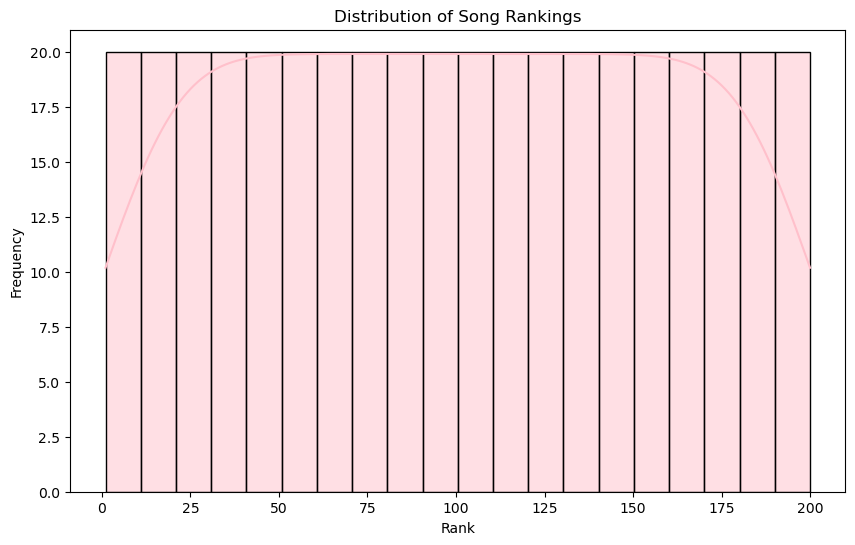

In [47]:
plt.figure(figsize=(10, 6))
sns.histplot(vis['Pos'], kde=True, color='pink', bins=20)
plt.title('Distribution of Song Rankings')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.show()


C:\Users\dr\AppData\Local\Temp\ipykernel_9060\543975834.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette='magma')


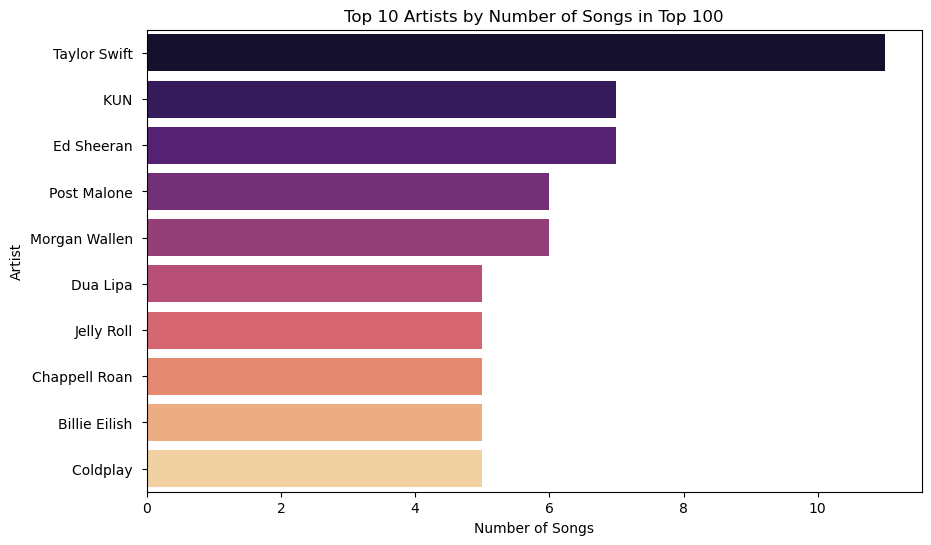

In [49]:
top_artists = vis['Artist'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='magma')
plt.title('Top 10 Artists by Number of Songs in Top 100')
plt.xlabel('Number of Songs')
plt.ylabel('Artist')
plt.show()


In [55]:
from wordcloud import WordCloud

In [61]:
merged_charts = pd.read_csv('merged_charts_1_2.csv')



In [63]:
text_data = ' '.join(merged_charts['Artist']) + ' ' + ' '.join(merged_charts['Title'])
text_data = ' '.join(merged_charts['Title'])


In [65]:
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='magma').generate(text_data)


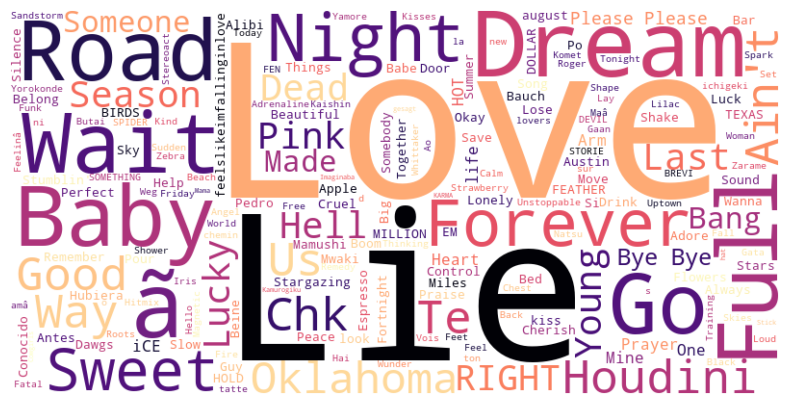

In [67]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.show()
